# Voice Activity Detection
- Đầu vào là file âm thanh có chứa tiếng nói, xác định vị trí bắt đầu và kết thúc của tiếng nói.
- Kỹ thuật sử dụng: năng lượng thời gian ngắn, nghĩa là tính năng lượng cho từng đoạn tín hiệu 50ms,
các đoạn tín hiệu này chồng lên nhau 10ms. Năng lượng được tính theo thang đo dB. Vẽ tín hiệu và năng lượng theo hàng dọc kèm vị trí thời điểm bắt đầu và thời điểm kết thúc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
# 1. Load file âm thanh
filename ="speech.wav"
y, sr = librosa.load(filename, sr = None) # giữ nguyên tần số


In [3]:
# 2. Thông số khung
frame_length = int(0.05 * sr)
frame_shift = int (0.01 * sr)

In [4]:
# 3. Chia khung và tính năng lượng
energies = []
frames = range(0, len(y) - frame_length, frame_shift)
for i in frames:
    frame = y[i:i+frame_length]
    energy = np.sum(frame**2)
    energy_db = 10 * np.log10(energy + 1e-6) 
    energies.append(energy_db)
energies = np.array(energies)    



In [5]:
# 4. Tìm ngưỡng phát hiện tiếng nói
threshold = np.mean(energies) * 0.9
voice_indices = np.where(energies > threshold)[0]
if len(voice_indices) > 0:
    start_frame = voice_indices[0]
    end_frame = voice_indices[-1]
    start_time = start_frame * frame_shift / sr
    end_time = (end_frame * frame_shift + frame_length) / sr
else:
    start_time, end_time = None, None
print(f"Speech starts at: {start_time:.2f} s, ends at: {end_time:.2f} s")

Speech starts at: 1.72 s, ends at: 4.84 s


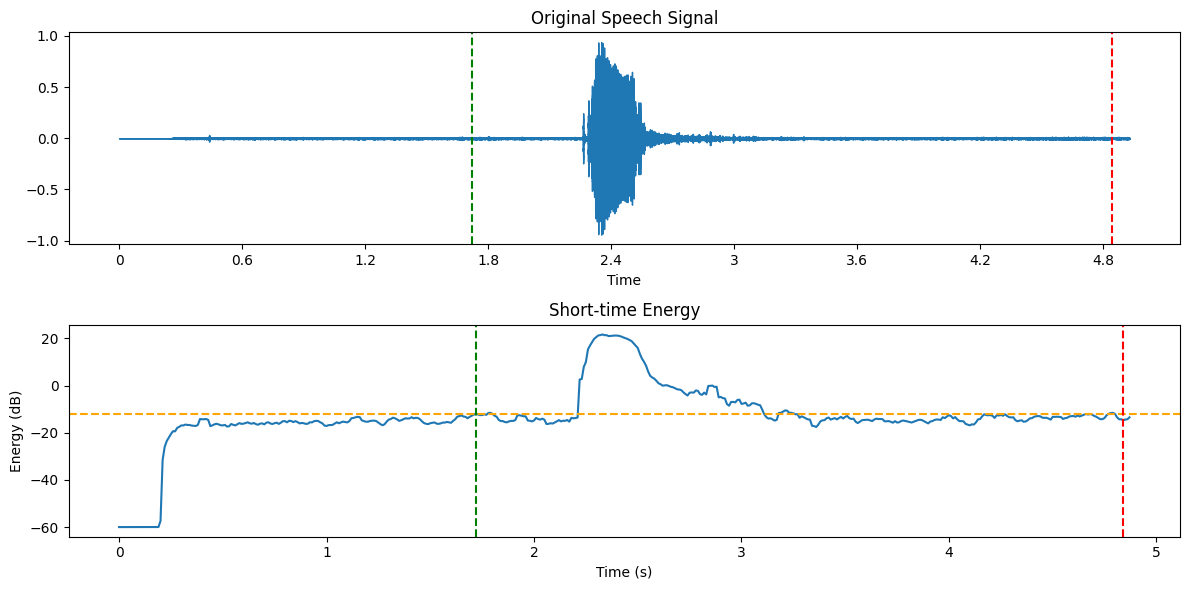

In [6]:
# 5. Vẽ tín hiệu và năng lượng
plt.figure(figsize=(12, 6))
# (a) Tín hiệu gốc
plt.subplot(2,1,1)
librosa.display.waveshow(y, sr=sr)
if start_time and end_time:
    plt.axvline(x=start_time, color='g', linestyle='--', label="Start")
    plt.axvline(x=end_time, color='r', linestyle='--', label="End")
plt.title("Original Speech Signal")
# (b) Năng lượng
plt.subplot(2,1,2)
times = np.arange(len(energies)) * frame_shift / sr
plt.plot(times, energies, label="Short-time Energy (dB)")
plt.axhline(y=threshold, color='orange', linestyle='--', label="Threshold")
if start_time and end_time:
    plt.axvline(x=start_time, color='g', linestyle='--')
    plt.axvline(x=end_time, color='r', linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Energy (dB)")
plt.title("Short-time Energy")
plt.tight_layout()
plt.show()